# Prophet — Model Testing

The code tests different models for univariate time series analysis to choose which one to use for forecasting. 

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It is an open source model released by Facebook's Core Data Science team. Prophet utilizes a generalized additive model (GAM) framework that combines linear and nonlinear components. 

Read its documentation [here](https://facebook.github.io/prophet/docs/quick_start.html).

## Setting libraries and dataframes

### Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Importing datasets and creating dataframe

In [2]:
data_hist = pd.read_csv("generated_data/historic_hi.csv")
data_rec = pd.read_csv("generated_data/recent_hi.csv")
data_lat = pd.read_csv("generated_data/latest_hi.csv")

In [3]:
### appends the two dataframes and creates a master dataframe
master = pd.concat([data_hist, data_rec, data_lat], ignore_index = True)

### filters for Miami-Dade county data
dade_daily_avg = master[master["COUNTY"] == "Miami-Dade"].reset_index(drop = True)
dade_daily_avg = dade_daily_avg.sort_values(by = "DATE", ascending = True).reset_index(drop = True)

### displays dataframe
dade_daily_avg

,COUNTY,LONG,LAT,ELEV,DATE,RAINFALL,TMIN,TMEAN,TMAX,TDMEAN,VPDMIN,VPDMAX,MONTH_YEAR,YEAR,MONTH_YEAR_STR,YEAR_STR,TMIN_INDEX,TMAX_INDEX,TMEAN_INDEX,REL_HUMIDITY
0,Miami-Dade,-80.5684,25.6148,7.0,1983-01-01,0.00,69.4,76.2,82.9,69.6,0.67,13.31,1983-01,1983,1983-01,1983,69.6,91.1,76.7,80.1
1,Miami-Dade,-80.5684,25.6148,7.0,1983-01-02,0.00,68.8,74.3,79.8,68.5,1.22,10.48,1983-01,1983,1983-01,1983,69.0,84.1,74.8,82.2
2,Miami-Dade,-80.5684,25.6148,7.0,1983-01-03,0.00,68.3,74.5,80.8,69.4,0.40,10.88,1983-01,1983,1983-01,1983,68.5,86.8,75.1,84.2
3,Miami-Dade,-80.5684,25.6148,7.0,1983-01-04,0.00,61.7,73.6,85.4,64.7,0.61,17.91,1983-01,1983,1983-01,1983,61.4,95.2,73.9,73.8
4,Miami-Dade,-80.5684,25.6148,7.0,1983-01-05,0.06,62.5,71.2,79.8,64.1,1.03,13.33,1983-01,1983,1983-01,1983,62.3,83.6,71.5,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,Miami-Dade,-80.5684,25.6148,7.0,2023-06-10,0.06,71.6,80.8,89.9,75.1,0.03,19.61,2023-06,2023,2023-06,2023,72.0,115.3,86.5,82.9
14771,Miami-Dade,-80.5684,25.6148,7.0,2023-06-11,0.51,73.7,82.4,91.0,75.0,0.27,22.37,2023-06,2023,2023-06,2023,74.1,115.7,89.3,78.4
14772,Miami-Dade,-80.5684,25.6148,7.0,2023-06-12,0.39,74.6,81.4,88.2,76.2,0.18,15.25,2023-06,2023,2023-06,2023,75.2,109.9,88.3,84.3
14773,Miami-Dade,-80.5684,25.6148,7.0,2023-06-13,0.53,74.5,81.1,87.6,76.3,0.23,13.53,2023-06,2023,2023-06,2023,75.1,108.4,87.8,85.4


In [4]:
### converts column to date-time type
dade_daily_avg["DATE"] = pd.to_datetime(dade_daily_avg["DATE"])

## Visualizing time series of daily mean temperatures

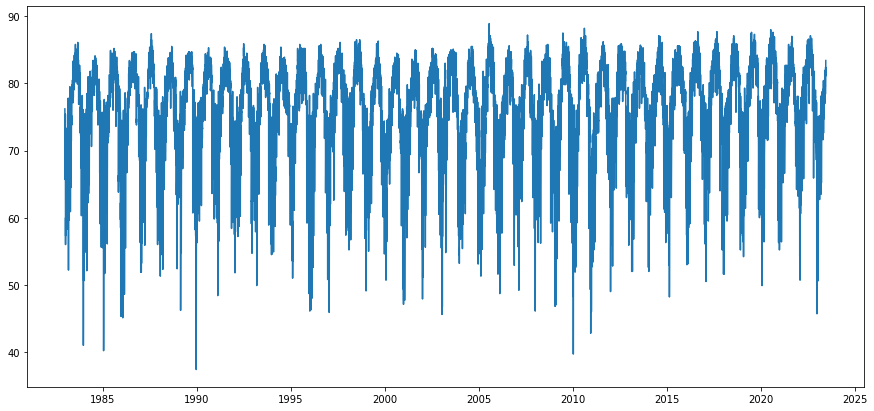

In [5]:
plt.figure(figsize = (15, 7))
plt.plot(dade_daily_avg["DATE"], dade_daily_avg["TMEAN"])
plt.show()

### Finalizing dataframe for modeling

In [7]:
### selects columns
cols = ["DATE", "TMEAN"]
df = dade_daily_avg[cols]

### converts date to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

### displays data
df

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_30727/736110486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"] = pd.to_datetime(df["DATE"])


,DATE,TMEAN
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
14770,2023-06-10,80.8
14771,2023-06-11,82.4
14772,2023-06-12,81.4
14773,2023-06-13,81.1


In [8]:
### displays row and index number
df[df["DATE"] == "2019-12-31"]

,DATE,TMEAN
13513,2019-12-31,74.7


In [9]:
### sets all rows before that of December 31, 2019 as training data
df_train = df.iloc[0:13514,].reset_index(drop = True)

### renames columns for modeling
df_train.columns = ["ds", "y"]

### displays data
df_train

,ds,y
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
13509,2019-12-27,72.6
13510,2019-12-28,75.4
13511,2019-12-29,75.7
13512,2019-12-30,76.2


In [10]:
### sets all rows after that of December 31, 2019 as testing data
df_test = df.iloc[13514:,].reset_index(drop = True)

### renames columns for modeling
df_test = df_test.rename(columns = {"DATE": "ds", "TMEAN": "y"})

### displays data
df_test

,ds,y
0,2020-01-01,69.2
1,2020-01-02,69.3
2,2020-01-03,71.8
3,2020-01-04,75.7
4,2020-01-05,71.3
...,...,...
1256,2023-06-10,80.8
1257,2023-06-11,82.4
1258,2023-06-12,81.4
1259,2023-06-13,81.1


In [11]:
### checks datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      13514 non-null  datetime64[ns]
 1   y       13514 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 211.3 KB


In [12]:
### checks datatypes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1261 non-null   datetime64[ns]
 1   y       1261 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [13]:
### creates dataframe for evaluation
df_test_2 = df_test[["ds"]]

### displays data
df_test_2

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1256,2023-06-10
1257,2023-06-11
1258,2023-06-12
1259,2023-06-13


### Modeling

In [14]:
### installs prophet
!pip install prophet

In [15]:
### imports libraries
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Running model with default yearly_seasonality (10)

In [16]:
model = Prophet(yearly_seasonality = True)
model.fit(df_train)

00:43:26 - cmdstanpy - INFO - Chain [1] start processing
00:43:28 - cmdstanpy - INFO - Chain [1] done processing


##### Implementing model 

In [17]:
forecast = model.predict(df_test_2)

### selects columns
forecast = forecast[["ds", "yhat"]]

### displays data
forecast

,ds,yhat
0,2020-01-01,69.277422
1,2020-01-02,69.111828
2,2020-01-03,69.085939
3,2020-01-04,69.039901
4,2020-01-05,68.855105
...,...,...
1256,2023-06-10,83.577636
1257,2023-06-11,83.608352
1258,2023-06-12,83.666204
1259,2023-06-13,83.748631


In [18]:
### merges testing and evaluation dataframes 
final_df = pd.concat((forecast["yhat"], df_test), axis = 1)

### displays data
final_df

,yhat,ds,y
0,69.277422,2020-01-01,69.2
1,69.111828,2020-01-02,69.3
2,69.085939,2020-01-03,71.8
3,69.039901,2020-01-04,75.7
4,68.855105,2020-01-05,71.3
...,...,...,...
1256,83.577636,2023-06-10,80.8
1257,83.608352,2023-06-11,82.4
1258,83.666204,2023-06-12,81.4
1259,83.748631,2023-06-13,81.1


##### Plotting results

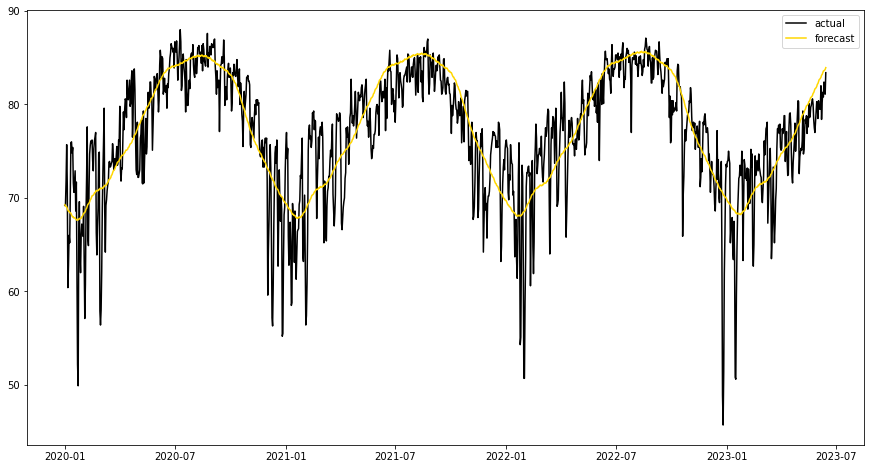

In [19]:
plt.figure(figsize = (15, 8))
plt.plot(final_df["ds"], final_df["y"], color = "black", label = "actual")
plt.plot(final_df["ds"], final_df["yhat"], color = "gold", label = "forecast")

plt.legend()

##### Computing error margins

In [20]:
### computes mean absolute error
mae = mean_absolute_error(final_df["y"], final_df["yhat"])

### computes root mean squared error
rmse = mean_squared_error(final_df["y"], final_df["yhat"], squared = False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2.954491693127341
Root Mean Squared Error (RMSE): 4.061405716929921


#### Running model with yearly_seasonality of 1,000

In [21]:
model = Prophet(yearly_seasonality = 1000)

model.fit(df_train)

00:44:40 - cmdstanpy - INFO - Chain [1] start processing
00:46:04 - cmdstanpy - INFO - Chain [1] done processing


##### Implementing model 

In [22]:
forecast = model.predict(df_test_2)

### selects columns
forecast = forecast[["ds", "yhat"]]

### displays data
forecast

,ds,yhat
0,2020-01-01,70.419717
1,2020-01-02,71.690789
2,2020-01-03,69.635659
3,2020-01-04,65.317713
4,2020-01-05,64.440437
...,...,...
1256,2023-06-10,82.758965
1257,2023-06-11,83.347407
1258,2023-06-12,83.657834
1259,2023-06-13,83.704108


In [23]:
### merges testing and evaluation dataframes 
final_df = pd.concat((forecast["yhat"], df_test), axis = 1)

### displays data
final_df

,yhat,ds,y
0,70.419717,2020-01-01,69.2
1,71.690789,2020-01-02,69.3
2,69.635659,2020-01-03,71.8
3,65.317713,2020-01-04,75.7
4,64.440437,2020-01-05,71.3
...,...,...,...
1256,82.758965,2023-06-10,80.8
1257,83.347407,2023-06-11,82.4
1258,83.657834,2023-06-12,81.4
1259,83.704108,2023-06-13,81.1


##### Plotting results

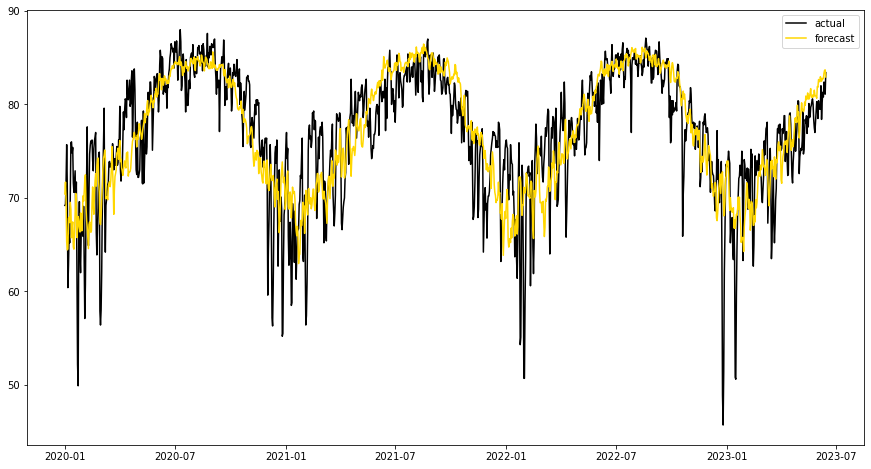

In [24]:
plt.figure(figsize = (15, 8))
plt.plot(final_df["ds"], final_df["y"], color = "black", label = "actual")
plt.plot(final_df["ds"], final_df["yhat"], color = "gold", label = "forecast")

plt.legend()

##### Computing error margins

In [25]:
### computes mean absolute error
mae = mean_absolute_error(final_df["y"], final_df["yhat"])

### computes root mean squared error
rmse = mean_squared_error(final_df["y"], final_df["yhat"], squared = False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.169813868596537
Root Mean Squared Error (RMSE): 4.361337620511645


##### Observations:

MAE (3°F) for "yearly_seasonality" as 10 is greater than MAE (3.2°F) for "yearly_seasonality" as 1,000. 
RMSE (4.1°F) for "yearly_seasonality" as 10 is lesser than RMSE (4.4°F) for "yearly_seasonality" as 1,000. 

The difference is less than 1°F for both, indicating not much will change if we keep increasing the Fourier component in the "yearly_seasonality" factor.

The plots show that the predictions are unable to capture the peaks and troughs well — although with seasonality 1,000 it does a better job. 

### Forecasting

#### Creating dataframe for training

In [26]:
### selects columns
cols = ["DATE", "TMEAN"]
df = dade_daily_avg[cols]

### converts date to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])
df.columns = ["ds", "y"]

### displays data
df

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_30727/1865663302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"] = pd.to_datetime(df["DATE"])


,ds,y
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
14770,2023-06-10,80.8
14771,2023-06-11,82.4
14772,2023-06-12,81.4
14773,2023-06-13,81.1


#### Creating dataframe for forecasting

In [27]:
### stores start and end dates
start_date = pd.to_datetime("2023-06-15")
end_date = pd.to_datetime("2053-12-31")

### computes interval between dates
date_range = pd.date_range(start = start_date, end = end_date, freq = "D")

### adds dates and creates dataframe
df_forecast = pd.DataFrame({"ds": date_range})

### displayes dataframe
df_forecast

,ds
0,2023-06-15
1,2023-06-16
2,2023-06-17
3,2023-06-18
4,2023-06-19
...,...
11153,2053-12-27
11154,2053-12-28
11155,2053-12-29
11156,2053-12-30


#### Implementing model

In [28]:
model = Prophet(yearly_seasonality = True)
model.fit(df)

00:46:08 - cmdstanpy - INFO - Chain [1] start processing
00:46:11 - cmdstanpy - INFO - Chain [1] done processing


#### Forecasts from model

In [29]:
forecast = model.predict(df_forecast)

### selects columns
forecast = forecast[["ds", "yhat"]]

### displays data
forecast

,ds,yhat
0,2023-06-15,83.352765
1,2023-06-16,83.528038
2,2023-06-17,83.630802
3,2023-06-18,83.602537
4,2023-06-19,83.623058
...,...,...
11153,2053-12-27,73.032000
11154,2053-12-28,72.833846
11155,2053-12-29,72.691104
11156,2053-12-30,72.563367


#### Plotting results

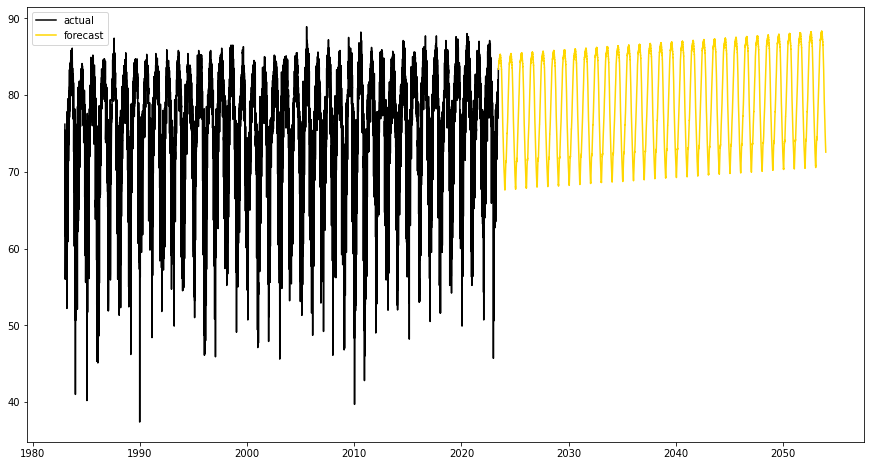

In [30]:
plt.figure(figsize = (15, 8))
plt.plot(df["ds"], df["y"], color = "black", label = "actual")
plt.plot(forecast["ds"], forecast["yhat"], color = "gold", label = "forecast")

plt.legend()